In [1]:
import pandas as pd
import numpy as np
import arrow
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('USvideos.csv')
df_10 = df[df['category_id'] == 10]

index = int(len(df_10)*0.8)
df_train =df_10[:index]
df_test = df_10[index:]

X_train = df_train[["likes"]].to_numpy()
Y_train = df_train["views"].to_numpy()
X_test = df_test[["likes"]].to_numpy()
Y_test = df_test["views"].to_numpy()

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, Y_train)

Y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

print("Random Forest - MSE: %.2f" % mse_rf)
print("Random Forest - R2 Score: %.2f" % r2_rf)

Random Forest - MSE: 183141521370563.16
Random Forest - R2 Score: 0.71


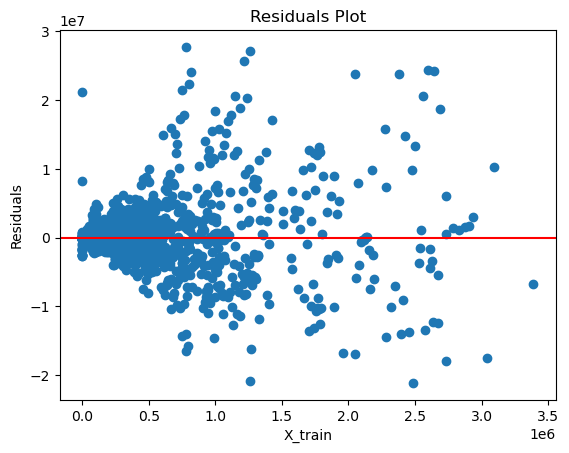

In [5]:
Y_train_pred = model_rf.predict(X_train)


residuals = Y_train - Y_train_pred
studentized_residuals = residuals / np.sqrt(mean_squared_error(Y_train, Y_train_pred))
outliers = np.abs(studentized_residuals) > 2
plt.scatter(X_train, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('X_train')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [6]:
print("Outliers based on studentized residuals:", np.where(outliers)[0])

outliers_indices = np.where(outliers)[0]


Outliers based on studentized residuals: [  37  104  113  149  173  185  270  320  336  377  413  419  424  452
  459  490  493  604  635  675  760  796  835  872  877  908  927  956
 1176 1215 1402 1482 1496 1555 1569 1582 1609 1631 1661 1686 1768 1862
 1887 1888 1916 1917 1948 1975 2066 2132 2171 2328 2335 2367 2706 2744
 2818 2840 2906 2915 2941 2948 2980 3127 3150 3217 3232 3276 3301 3328
 3353 3379 3396 3405 3419 3425 3428 3437 3454 3466 3485 3497 3510 3512
 3515 3527 3539 3544 3556 3572 3577 3602 3607 3633 3638 3668 3672 3675
 3703 3705 3708 3710 3735 3737 3740 3767 3795 3833 3903 3955 4058 4086
 4126 4152 4178 4188 4248 4262 4269 4270 4282 4301 4313 4324 4344 4346
 4366 4391 4392 4400 4406 4409 4424 4431 4434 4439 4440 4454 4462 4463
 4472 4474 4487 4489 4495 4496 4499 4506 4519 4521 4527 4528 4532 4539
 4551 4558 4559 4566 4574 4585 4587 4604 4607 4617 4624 4639 4641 4652
 4665 4671 4674 4684 4702 4705 4727 4733 4736 4756 4766 4769 4790 4801
 4836 4838 4846 4855 4863 4864 4874 

In [7]:
cleaned_X = np.delete(X_train, outliers_indices, axis=0)
cleaned_y = np.delete(Y_train, outliers_indices, axis=0)

model_rf.fit(cleaned_X, cleaned_y)
Y_pred = model_rf.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("new MSE: %.2f" % mse)
print("new R2 Score: %.2f" % r2)

new MSE: 159886504597007.75
new R2 Score: 0.75
